In [44]:
## library
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

In [45]:
def snell(n1, n2,theta):
    theta_1_rad = np.radians(theta)
    theta_2_rad = np.arcsin(n1 / n2 * np.sin(theta_1_rad)).astype(float)
    return np.degrees(theta_2_rad)

In [46]:
def crit_ang(n1, n2):
    if (n2.real<n1.real):
        return np.degrees(np.arcsin(n2.real / n1.real).astype(float))
    else:
        return print ("There is no critical angle for the pair of medium.")

In [47]:
def TRS(n1,n2,ang1,ang2):
    rs = (n1*np.cos(ang1*np.pi/180)-n2*np.cos(ang2*np.pi/180)) / (n1*np.cos(ang1*np.pi/180)+n2*np.cos(ang2*np.pi/180))
    rp = (n2*np.cos(ang1*np.pi/180)-n1*np.cos(ang2*np.pi/180)) / (n2*np.cos(ang1*np.pi/180)+n1*np.cos(ang2*np.pi/180))
    ts = (2.0*n1*np.cos(ang1*np.pi/180)) / (n1*np.cos(ang1*np.pi/180)+n2*np.cos(ang2*np.pi/180))
    tp = (2.0*n1*np.cos(ang1*np.pi/180)) / (n2*np.cos(ang1*np.pi/180)+n1*np.cos(ang2*np.pi/180))
    return rs,rp,ts,tp

In [48]:
def Matrix(rho,delta):
    M = [[np.exp(delta*1j),rho*np.exp(delta*1j)],[rho*np.exp(-delta*1j),np.exp(-delta*1j)]]
    return M

In [49]:
## input variable
w_l = 1550e-9
k0 = 2.0 * np.pi / w_l

In [50]:
theta_inc = 0

In [56]:
## Thichness of Layers
#L1 = [5e-9,10e-6,15e-9,20e-9, 25e-9,30e-9,35e-9,40e-9]
L2 = [10e-6,15e-6,20e-6, 25e-6,30e-6,35e-6,40e-6,50e-6,55e-6,60e-6,70e-6,80e-6]
L1 = 20e-9
#L2 = 20e-9

In [62]:
### Matrix formation
R = []
A = []
T = []

for i in range(len(L2)):
    ## 1st interface
    n_a = 1.0 
    #n_gst = 4.3 + 0.0*1j   ## crystalline
    #n_gst = 4.3 + 0.34*1j ## crystalline
    n_gst = 3.0 + 0.00*1j ## amourphous
    ref_ang = snell(n1=n_a, n2=n_gst.real,theta=theta_inc)
    rs1,rp1,ts1,tp1 = TRS(n1=n_a,n2=n_gst,ang1=theta_inc,ang2=ref_ang)
    delta = (2.0*np.pi*n_gst*0*np.cos(ref_ang*np.pi/180))/w_l
    M1 = Matrix(rs1,delta)
    ## 2nd interface
    #n_gst = 4.3 + 0.34*1j  ## crystalline
    #n_gst = 4.3 + 0.0*1j  ## crystalline
    n_gst = 3.0 + 0.0*1j ## amourphous
    #n_Al = 1.57 - 15.65*1j  ## Al
    n_Si = 1.00 + 0.0*1j 
    ref_ang2 = snell(n1=n_gst.real, n2=n_Si.real,theta=ref_ang)
    rs2,rp2,ts2,tp2 = TRS(n1=n_gst, n2=n_Si,ang1=ref_ang,ang2=ref_ang2)
    delta2 = (2.0*np.pi*n_Si*L1*np.cos(ref_ang2*np.pi/180))/w_l
    M2 = Matrix(rs2,delta2)
    ### 3rd layer
    #n_Al = 1.57 - 15.65*1j  ## Al
    n_Si = 1.00 + 0.0*1j
    n_a = 1.0
    ref_ang3 = snell(n1=n_Si.real, n2=n_a,theta=ref_ang2)
    rs3,rp3,ts3,tp3 = TRS(n1=n_Si, n2=n_a,ang1=ref_ang2,ang2=ref_ang3)
    delta3 = (2.0*np.pi*n_Si*L2[i]*np.cos(ref_ang3*np.pi/180))/w_l
    M3 = Matrix(rs3,delta3)
    M_f = np.matmul(M1,M2) 
    M_f1 = np.matmul(M_f,M3)
    M_f1c = np.conj(M_f1)
    H1 = M_f1[1][0]*M_f1c[1][0]
    H2 = M_f1[0][0]*M_f1c[0][0]
    Rs = H1.real/H2.real
    T1= ts1*np.conj(ts1)*ts2*np.conj(ts2)*ts3*np.conj(ts3)
    Ts = T1.real/H2.real
    As = 1.0 - (Ts+Rs)
    R.append(Rs)
    T.append(Ts)
    A.append(As)
    
print(len(R))
print(len(T))
print(len(A))





12
12
12


(1e-05, 8e-05)

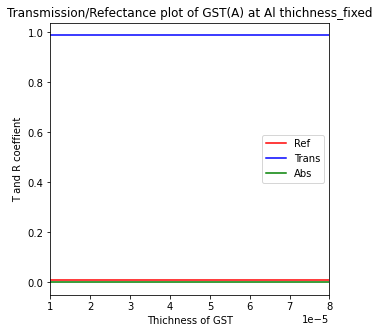

In [63]:
plt.figure(figsize=(5, 5))
plt.plot(L2,R, 'r', label='Ref')
plt.plot(L2,T,'b', label = 'Trans') 
plt.plot(L2,A, 'g', label='Abs')
plt.xlabel('Thichness of GST')  
plt.ylabel('T and R coeffient')  # Add a y-label to the axes.
plt.title("Transmission/Refectance plot of GST(A) at Al thichness_fixed")  # Add a title to the axes.
plt.legend()
plt.xlim(10e-6, 80e-6)
